<a href="https://colab.research.google.com/github/Marcusreu1/Tipos-de-algoritmos-ML-/blob/main/Algoritmos_supervisados/Modelo_KNN_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [2]:
!wget https://raw.githubusercontent.com/Marcusreu1/Tipos-de-algoritmos-ML-/main/salary%20dataset/carros.csv

--2024-04-03 17:22:14--  https://raw.githubusercontent.com/Marcusreu1/Tipos-de-algoritmos-ML-/main/salary%20dataset/carros.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 573 [text/plain]
Saving to: ‘carros.csv’

carros.csv          100%[===================>]     573  --.-KB/s    in 0s      

2024-04-03 17:22:15 (17.0 MB/s) - ‘carros.csv’ saved [573/573]



In [3]:
df=pd.read_csv('carros.csv')

In [4]:
df.head()

,kms,precio
0,6048,1385956
1,11825,1297582
2,20000,1000000
3,21048,1284844
4,21549,685300


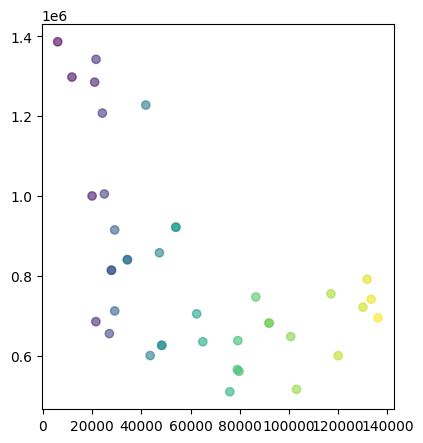

In [12]:
fig= plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,2,1)

ax.scatter(df['kms'], df['precio'], c=range(df['kms'].size),alpha=0.6)

##escalar

In [14]:
escala_km2=preprocessing.MinMaxScaler()
escala_precio=preprocessing.MinMaxScaler()

kms= escala_km2.fit_transform(df['kms'].values.reshape(-1,1))
precios=escala_precio.fit_transform(df['precio'].values.reshape(-1,1))

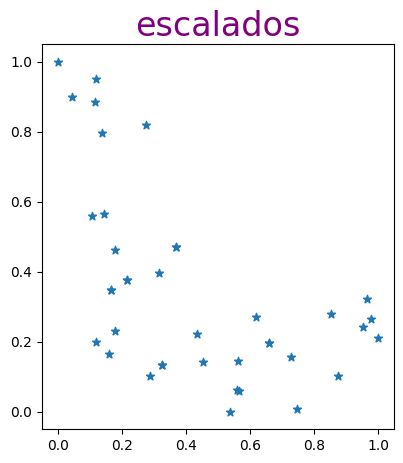

In [18]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,2,2)

ax.scatter(kms,precios, marker="*")

ax.set_title('escalados', size=24, color="purple")
plt.show()

##modelo

In [20]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(kms,precios)


kms_instancia=escala_km2.transform([[20000]])
precio_instancia=knn.predict(kms_instancia)
escala_precio.inverse_transform(precio_instancia)


array([[990048.]])

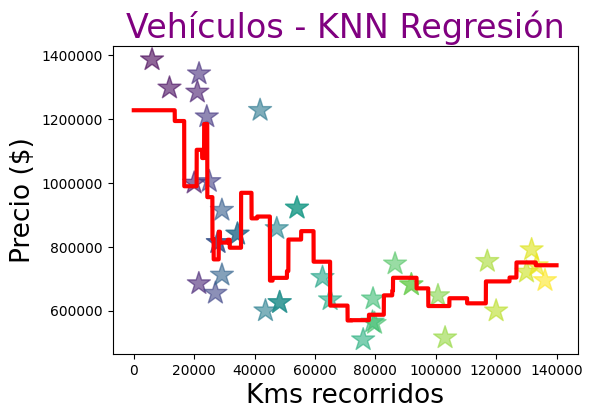

In [27]:
# Múltiples regresiones de los valores dentro del rango
kms_instancias = escala_km2.transform(np.arange(140000).reshape(-1, 1))
precio_instancias = knn.predict(kms_instancias)
todas = escala_precio.inverse_transform(precio_instancias)
todas = todas.reshape(1, -1)

# Graficar los resultados de las múltiples regresiones
fig = plt.figure(figsize=(6, 4))

plt.plot(np.arange(140000), todas.reshape(1, -1)[0],
        linewidth=3, color="red")

plt.scatter(df["kms"], df["precio"], marker="*",
            s=300, c=range(df["kms"].size), alpha=0.6)

plt.title("Vehículos - KNN Regresión", size=24, color="purple")
plt.ylabel("Precio ($)", size=19)
plt.xlabel("Kms recorridos", size=19)
plt.ticklabel_format(style="plain")
plt.show()